In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

from perturbseq import *

Load the file from .hdf. 

In [6]:
pop = CellPopulation.from_hdf('/scratch/network/katiest/pop.hdf')

Loading matrix...
Loading metadata...
Done in 21.724364757537842s.
Done.


In [3]:
pop.info()

Matrix
<class 'pandas.core.frame.DataFrame'>
Index: 50440 entries, AAACATACAAGATG-1 to TTTGCATGTGGAGG-10
Columns: 22760 entries, ENSG00000243485 to ENSG00000215699
dtypes: int32(22760)
memory usage: 4.3 GB


In [8]:
pop.cells.head()

,guide_identity,guide_read_count,guide_UMI_count,guide_coverage,good_coverage,number_of_cells,guide_target,single_cell,UMI_count,gem_group
cell_barcode,,,,,,,,,,
AAACATACAAGATG-1,63(mod)_pBA580,282.0000,8.0000,35.2500,True,1.0000,63(mod),True,8866,1
AAACATACACCTAG-1,OST4_pDS353,331.0000,7.0000,47.2857,True,1.0000,OST4,True,13785,1
AAACATACTTCCCG-1,SEC61A1_pDS031,285.0000,10.0000,28.5000,True,1.0000,SEC61A1,True,7569,1
AAACATTGAAACAG-1,EIF2B4_pDS491,1036.0000,30.0000,34.5333,True,1.0000,EIF2B4,True,13834,1
AAACATTGCAGCTA-1,SRPR_pDS482,863.0000,25.0000,34.5200,True,1.0000,SRPR,True,15507,1


In [ ]:
pop.matrix = equalize_UMI_counts(pop.matrix)
pop.matrix.head()

In [11]:
mean_pop = pop.average('guide_target', verbose=True)

Computing average expression matrices...
Applying to key 63(mod)...
Applying to key AARS...
Applying to key AMIGO3...
Applying to key ARHGAP22...
Applying to key ASCC3...
Applying to key ATP5B...
Applying to key CAD...
Applying to key CARS...
Applying to key CCND3...
Applying to key CHERP...
Applying to key COPB1...
Applying to key COPZ1...
Applying to key DAD1...
Applying to key DARS...
Applying to key DDOST...
Applying to key DDRGK1...
Applying to key DERL2...
Applying to key DHDDS...
Applying to key DNAJC19...
Applying to key EIF2B2...
Applying to key EIF2B3...
Applying to key EIF2B4...
Applying to key EIF2S1...
Applying to key FARSB...
Applying to key FECH...
Applying to key GBF1...
Applying to key GMPPB...
Applying to key GNPNAT1...
Applying to key Gal4-4(mod)...
Applying to key HARS...
Applying to key HSD17B12...
Applying to key HSPA5...
Applying to key HSPA9...
Applying to key HYOU1...
Applying to key IARS2...
Applying to key IDH3A...
Applying to key IER3IP1...
Applying to key K

KeyboardInterrupt: 

In [26]:
mean_pop.info()

Matrix
<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 63(mod) to YIPF5
Columns: 22760 entries, ENSG00000243485 to ENSG00000215699
dtypes: float64(22760)
memory usage: 14.6 MB


In [27]:
mean_pop.matrix.head()

gene_id,ENSG00000243485,ENSG00000239945,ENSG00000237683,ENSG00000228463,ENSG00000237094,ENSG00000230021,ENSG00000235373,ENSG00000228327,ENSG00000237491,ENSG00000177757,...,ENSG00000215750,ENSG00000215689,ENSG00000212857,ENSG00000215781,ENSG00000218497,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215700,ENSG00000215699
63(mod),0.0000,0.0002,0.0044,0.0007,0.0000,0.0002,0.0004,0.0061,0.0100,0.0000,...,0.2690,0.0076,0.0004,0.1541,0.0000,0.7493,0.0004,0.1417,0.0007,0.0144
AARS,0.0000,0.0000,0.0083,0.0000,0.0000,0.0000,0.0000,0.0056,0.0083,0.0000,...,0.0833,0.0111,0.0000,0.1667,0.0000,1.2194,0.0000,0.0694,0.0000,0.0111
AMIGO3,0.0000,0.0000,0.0032,0.0016,0.0000,0.0000,0.0000,0.0032,0.0146,0.0000,...,0.2679,0.0032,0.0000,0.1575,0.0000,0.7987,0.0000,0.1169,0.0016,0.0130
ARHGAP22,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0148,0.0000,...,0.2266,0.0246,0.0025,0.1650,0.0000,0.8079,0.0025,0.1305,0.0000,0.0172
ASCC3,0.0000,0.0014,0.0041,0.0014,0.0000,0.0000,0.0000,0.0041,0.0108,0.0000,...,0.2277,0.0081,0.0000,0.1365,0.0000,0.6466,0.0000,0.1297,0.0000,0.0169


In [32]:
z_normalize_expression(mean_pop)

/home/katiest/QCB445/perturbseq/expression_normalization.py:108: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  m_out = pre.scale(m.as_matrix(), axis=0)


gene_id,ENSG00000243485,ENSG00000239945,ENSG00000237683,ENSG00000228463,ENSG00000237094,ENSG00000230021,ENSG00000235373,ENSG00000228327,ENSG00000237491,ENSG00000177757,...,ENSG00000215750,ENSG00000215689,ENSG00000212857,ENSG00000215781,ENSG00000218497,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215700,ENSG00000215699
63(mod),-0.2945,-0.4307,-0.1491,-0.1038,-0.1098,0.4698,0.5595,0.0658,-0.3178,-0.1839,...,0.7127,-0.5316,-0.3965,-0.6644,-0.1098,-0.7994,0.0883,0.5958,-0.1152,-0.5482
AARS,-0.2945,-0.6264,1.9205,-0.6249,-0.1098,-0.1166,-0.2835,0.6088,0.0786,-0.1839,...,-2.2178,0.9558,-0.7118,1.0716,-0.1098,3.7342,-0.4265,-0.6821,-0.5114,-0.2557
AMIGO3,-0.2945,-0.6264,-0.4249,0.6965,-0.1098,-0.1166,-0.2835,-0.6830,0.5807,-0.1839,...,0.7956,-1.2758,-0.7118,-0.5379,-0.1098,-0.5127,-0.4265,-0.1174,0.4932,-0.7243
ARHGAP22,-0.2945,1.6774,-1.3018,-0.6249,-0.1098,-0.1166,-0.2835,-0.8844,0.6680,-0.1839,...,0.0514,2.5806,1.1444,-0.3221,-0.1098,-0.3985,2.6045,0.4097,-0.5114,0.0139
ASCC3,-0.2945,0.7020,-0.1279,0.5545,-0.1098,-0.1166,-0.2835,-0.3812,0.0148,-0.1839,...,0.3144,-0.3159,-0.7118,-0.7587,-0.1098,-0.9853,-0.4265,0.6012,-0.5114,0.0976
ATP5B,-0.2945,-0.6264,-0.8241,-0.6249,-0.1098,-0.1166,-0.2835,-0.1179,0.1628,4.8574,...,-0.2250,-0.9129,0.5948,0.4782,-0.1098,-0.3666,-0.4265,0.0495,-0.5114,-1.1053
CAD,-0.2945,-0.6264,2.1573,-0.6249,-0.1098,-0.1166,-0.2835,-0.4024,1.8432,-0.1839,...,-0.6542,1.9143,-0.7118,-0.7820,-0.1098,0.6726,-0.4265,0.5212,-0.5114,1.9864
CARS,-0.2945,-0.6264,1.7830,-0.6249,-0.1098,-0.1166,-0.2835,-0.5291,2.1239,-0.1839,...,-1.3170,3.5203,-0.7118,2.1532,-0.1098,1.6931,-0.4265,-0.5730,4.2008,-0.3646
CCND3,-0.2945,-0.6264,0.3649,-0.6249,-0.1098,-0.1166,5.8112,0.9662,1.3122,-0.1839,...,1.3082,1.9587,1.5676,-1.6414,-0.1098,-0.1509,-0.4265,2.4900,-0.5114,-0.3328
CHERP,-0.2945,1.3230,-1.3018,-0.6249,-0.1098,-0.1166,-0.2835,-0.9905,0.2333,-0.1839,...,-1.5328,-1.0986,-0.7118,1.0195,-0.1098,2.3503,-0.4265,-1.3538,-0.5114,0.2619


In [33]:
mean_pop.to_hdf('/scratch/network/katiest/mean_pop.hdf')

Writing matrix...
Writing metadata...
Done in 0.11048150062561035s.


Can now start the code from here...the matrix is now averaged by guide target and z-normalized... 

In [2]:
mean_pop = CellPopulation.from_hdf('/scratch/network/katiest/mean_pop.hdf')

Loading matrix...
Loading metadata...
Done in 1.0709469318389893s.
Done.


478 variable genes found (0 excluded)


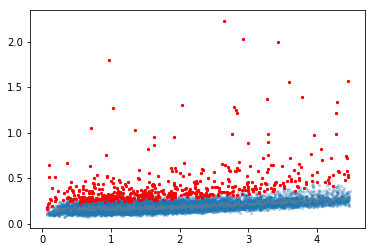

In [3]:
noisy_genes = find_noisy_genes(mean_pop) 

In [4]:
mean_pop.where(genes=noisy_genes, gene_names=True)

,HES4,ATAD3B,SMIM1,MRTO4,ID3,RHD,RHCE,CD52,AIM1L,RCC1,...,SLC19A1,AL133493.2,LSS,MT-ND1,MT-ND2,MT-CO1,MT-ATP6,MT-ND3,MT-ND4,MT-CYB
63(mod),0.9473,0.4094,0.5695,2.9656,0.1946,0.1600,1.4851,1.0487,0.0653,0.8666,...,0.4492,0.0971,0.1850,53.2202,73.7271,210.8087,83.3171,2.5624,139.8357,98.5676
AARS,0.6250,0.1611,0.2194,1.1917,0.1611,0.0472,0.3472,0.8028,0.1250,0.3444,...,0.1389,0.0389,0.1444,31.8667,32.7472,129.4167,35.0806,1.2056,71.6778,49.7167
AMIGO3,0.9091,0.3604,0.5227,2.8377,0.1721,0.1477,1.4091,0.8831,0.0682,0.8084,...,0.4935,0.1055,0.1981,50.4107,70.2062,198.6948,79.4286,2.5698,133.2062,96.2256
ARHGAP22,1.0419,0.3177,0.6453,2.1576,0.0172,0.1626,1.2734,1.1773,0.0739,0.7340,...,0.3350,0.0714,0.3251,52.4409,67.6700,242.3990,97.5049,2.2759,153.2463,104.3695
ASCC3,0.8574,0.3926,0.4230,2.6838,0.1986,0.1230,1.0696,1.3655,0.0682,0.8966,...,0.4520,0.0851,0.1764,43.7946,67.9838,179.2122,78.2459,2.5135,122.6162,83.0068
ATP5B,0.8464,0.3090,0.4534,2.5046,0.1554,0.1243,1.2084,0.6033,0.0750,0.7532,...,0.4022,0.0731,0.1627,50.5393,69.7112,210.9068,83.3912,2.0475,147.7093,118.9196
CAD,1.0455,0.3306,0.8140,2.2190,0.2231,0.3140,2.6612,0.8058,0.0579,0.6736,...,0.2727,0.0744,0.1570,68.4339,76.9793,201.8554,55.4959,1.8884,124.4256,91.1570
CARS,0.5268,0.1795,0.1935,0.8578,0.2657,0.0163,0.3217,0.9417,0.0583,0.2424,...,0.1399,0.0326,0.1142,25.8252,23.8462,123.4942,28.7552,1.0629,61.1096,37.7389
CCND3,0.7032,0.4065,0.9516,2.5516,0.1065,0.1710,1.7581,1.0065,0.0194,0.7452,...,0.4194,0.1290,0.2774,71.5935,84.0387,246.5194,81.8968,2.8129,155.8484,118.9194
CHERP,0.4950,0.3490,0.4480,2.9505,0.1733,0.1535,1.1287,0.8960,0.0446,0.7698,...,0.4406,0.1163,0.3168,60.1337,74.4703,259.4752,68.4728,2.1757,155.3267,120.1856


In [5]:
mean_pop.expression(genes=noisy_genes)

AttributeError: 'CellPopulation' object has no attribute 'expression'

In [28]:
mean_pop.average('gene_id')

Computing average expression matrices...


KeyError: 'gene_id'

In [37]:
correlation_heatmap(mean_pop, noisy_genes, normalized=True)

TypeError: 'NoneType' object is not subscriptable

In [24]:
type(mean_pop)

perturbseq.cell_population.CellPopulation

In [39]:
mean_pop.cluster_genes(genes=noisy_genes)

TypeError: 'NoneType' object is not subscriptable